## Final Project Submission

Please fill out:
* Student name: Alex Billinger
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Rafael Carrasco
* Blog post URL:

In [122]:
#import and preview data set
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('kc_house_data.csv')
print(df.info())

df.drop(['lat','long','id','view','yr_renovated'],axis=1,inplace=True)
df.fillna(0,inplace=True)
df['sqft_basement'] = df['sqft_basement'].replace('?','0.0')
df['sqft_basement'] = df['sqft_basement'].astype(float)
df['date'] = pd.to_datetime(df['date'])
print(df.info())
df.head()
df.to_csv('kc_house_data_cleaned.csv',index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB
None
<class 

- yr_renovated     17755 non-null float64 mostly '0' value place holder, drop column
- waterfront       19221 non-null float64 median 0, fill nan with 0
- view             21534 non-null float64 not useful data, drop column
- id, lat, long not useful, drop columns
- Date to datetime format
- sqft_basement replace '?' place holder, convert to float
- dependent value/targe: price

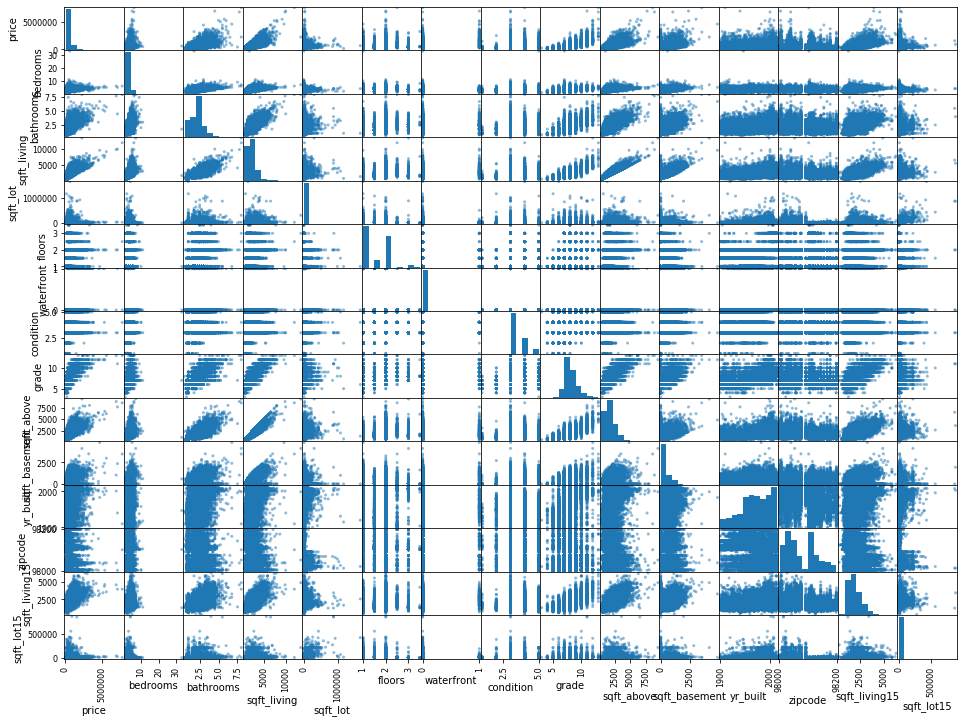

In [40]:
pd.plotting.scatter_matrix(df,figsize=(16,12))
plt.show()

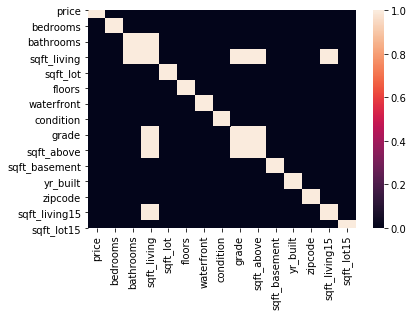

In [121]:
x = abs(df.corr())>.75
sns.heatmap(x)

### Multicollinear
- sqft_living, bathrooms, grade, sqft_above,sqft_living15
- sqft_above, grade

### How to deal with these?
Drop: bathrooms, sqft_above,sqft_living15<br>
What about grade? Want to use both grade and sqft_living.

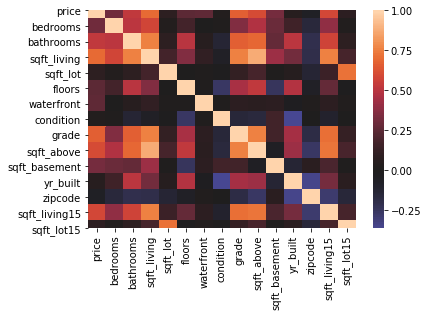

In [89]:
to_drop = ['date']
temp = df.drop(to_drop,axis=1)
sns.heatmap(temp.corr(),center=0)

In [119]:
abs(df.corr())>.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,True,True,False,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False
sqft_above,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False


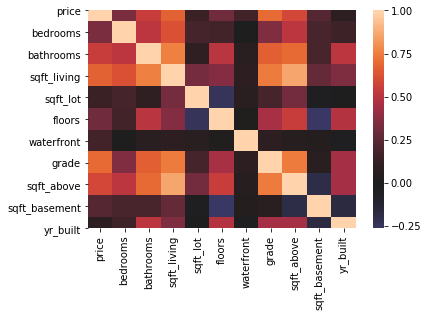

In [114]:
sns.heatmap(temp.corr(),center=0)

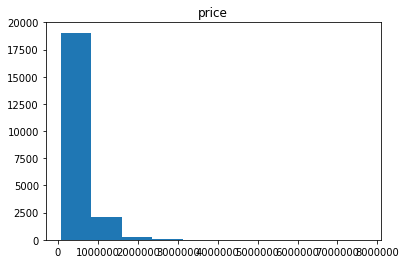

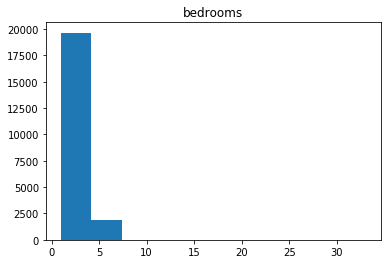

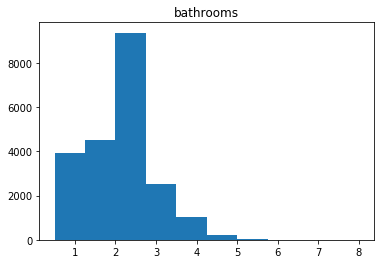

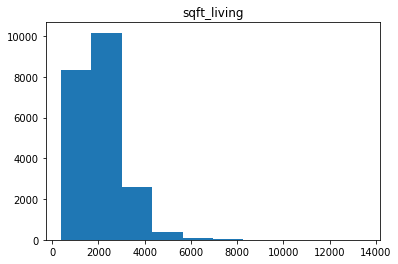

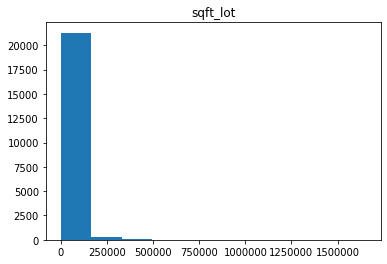

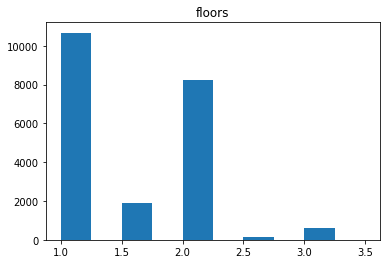

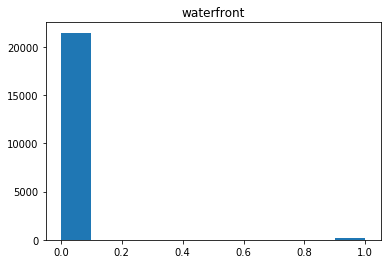

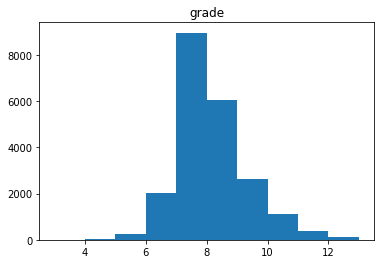

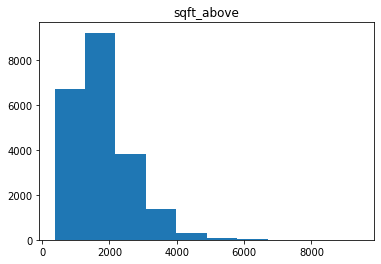

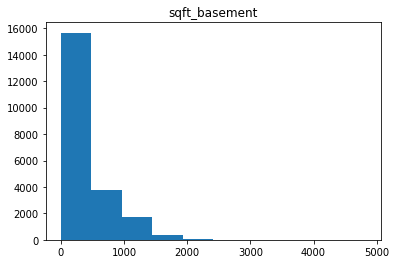

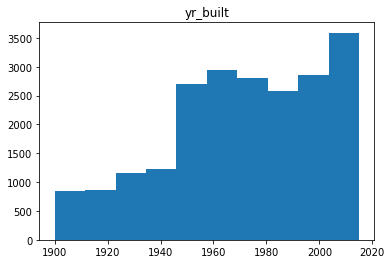

In [110]:
to_drop = ['date','sqft_lot15','sqft_living15','zipcode','condition']
lst = ['price','sqft_living','sqft_lot','sqft_above']
temp = df.drop(to_drop,axis=1)
for x in lst: temp[x]=np.log(temp[x])
temp['sqft_basement'].where(temp['sqft_basement']==0,np.log(temp['sqft_basement']),inplace=True)
for x in temp.columns:
    fig = plt.figure()
    plt.hist(df[x])
    plt.title(x)

In [109]:
temp['sqft_basement']

0         -inf
1        400.0
2         -inf
3        910.0
4         -inf
         ...  
21592     -inf
21593     -inf
21594     -inf
21595     -inf
21596     -inf
Name: sqft_basement, Length: 21597, dtype: float64

In [111]:
for col in temp.columns:
    if col == 'price': continue
    f = 'price~'+col
    model = ols(f,temp).fit()
    print(model.pvalues)

Intercept    0.0
bedrooms     0.0
dtype: float64
Intercept    0.0
bathrooms    0.0
dtype: float64
Intercept      0.0
sqft_living    0.0
dtype: float64
Intercept    0.000000e+00
sqft_lot     1.214739e-92
dtype: float64
Intercept    0.0
floors       0.0
dtype: float64
Intercept      0.000000e+00
waterfront    6.303414e-141
dtype: float64
Intercept    0.0
grade        0.0
dtype: float64
Intercept     0.0
sqft_above    0.0
dtype: float64
Intercept         0.000000e+00
sqft_basement    1.211547e-263
dtype: float64
Intercept    0.000000e+00
yr_built     1.885764e-32
dtype: float64
